# Thorough EDA On Walmart Dataset With Android Device
![source: yimg](https://s.yimg.com/uu/api/res/1.2/JjKbI0vWIFhEo2ue.Dc9Xw--~B/Zmk9ZmlsbDtoPTQ1MDt3PTY3NTthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-images/2020-02/06aa6aa0-4eaa-11ea-bbff-98739d2b5dc3.cf.webp)

## Introduction

This project was done to illustrate exploratory data analysis skills with a smartphone. The demand for data analysts require that a skilled analyst should be flexible in performance so as to be able to meet targets. With its portability and long lasting energy, smartphones can be used anywhere for a longer time than other computer devices.

This analysis was done offline with a Samsung smartphone with the aid of an Android app - Pydroid 3 - that mimics python 3x. This app was developed by IIEC.

### About Walmart

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. 

The company was founded by Sam Walton in nearby Rogers, Arkansas in 1962 and incorporated under Delaware General Corporation Law on October 31, 1969. It also owns and operates Sam's Club retail warehouses. As of April 30, 2022, Walmart has 10,585 stores and clubs in 24 countries, operating under 46 different names. 

The company operates under the name Walmart in the United States and Canada, as Walmart de México y Centroamérica in Mexico and Central America, and as Flipkart Wholesale in India. It has wholly owned operations in Chile, Canada, and South Africa. 

Since August 2018, Walmart holds only a minority stake in Walmart Brasil, which was renamed Grupo Big in August 2019, with 20 percent of the company's shares, and private equity firm Advent International holding 80 percent ownership of the company. In this analysis, only 45 stores of Walmart located in the US are considered.

### Problem Statement

Walmart runs several promotional markdowns during different holidays of the year. These markdowns are known to affect sales. Knowing which of the holidays that drive sales will be important to make decisions regarding the markdowns[<sup>1</sup>](#fn1).

# How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Dataset Collection.

The datasets were sourced from Kaggle through this [link](www.kaggle.com/tunguz/us-elections-dataset). Below, the datasets are downloaded with `opendatasets` library.

In [111]:
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset' 

In [ ]:
import opendatasets as od
od.download(dataset_url); --quiet

The dataset files have been downloaded and extracted. In the following cells, the folder to which the files were extracted to are inspected with `os` library.

In [108]:
# The data directory is assigned to data_dir
data_dir = './walmart-sales-forecast'

In [109]:
import os
# the files contained in the directory are inspected
os.listdir(data_dir);

The project will be hosted in Jovian platform. The platform provides a library that commits jupyter notebooks to user's profile. In the following cell the project is uploaded and saved to Jovian.

In [57]:
project_name = "Thorough EDA on Walmart dataset with Android" # change this (use lowercase letters and hyphens only)

In [3]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


Four csv files have been downloaded namely: features, stores, test and train. For this analysis, only three of the files will be relevant. The content description of each of the files are as follows:

stores.csv:

This file contains anonymized information about the 45 stores, indicating the type and size of store.

train.csv:

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

* Store - the store number.
* Dept - the department number.
* Date - the week.
* Weekly_Sales -  sales for the given department in the given store.
* IsHoliday - whether the week is a special holiday week.

features.csv:

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

* Store - the store number.
* Date - the week.
* Temperature - average temperature in the region.
* Fuel_Price - cost of fuel in the region.
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index.
* Unemployment - the unemployment rate.
* IsHoliday - whether the week is a special holiday week.

## Data Preparation and Cleaning

In This section, the datasets will be merged, inspected to get the general veiw of the shape (that is, the number of observations, the features and the data types of the various features), cleaned and prepared for analysis.

The needed libraries are imported and the plotting properties are set as desired in the next cell.

In [2]:
import pandas as pd # for tabular data manipulation
import numpy as np # for linear algebra
from statistics import mode # for numeric mode value
import missingno as msno # for handling missing values
import seaborn as sns # for graph plotting
import matplotlib # for graph plotting
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignoring warnings

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Loading The Dataset

In [3]:
df1 = pd.read_csv('./walmart-sales-forecast/features.csv')
df2 = pd.read_csv('./walmart-sales-forecast/stores.csv')
df3 = pd.read_csv('./walmart-sales-forecast/train.csv')

As stated earlier, the downloaded files consist of four different datasets which include: the features, stores, train and the test which are all csv files. Out of these datasets, the test dataset is excluded as it is not suited for the purpose of this analysis.

The features, stores and the train datasets are were loaded into this notebook with pandas' CSV-input API and stored in the following variables respectively `df1, df2` and `df3`.

In the next line of code, the names of the different features of the different datasets are printed as a python's dictionary objects with the respective dataset's name as `key` and the features' names as `value`.

In [4]:
features = dict((('df1',list(df1.columns)),
('df2',list(df2.columns)),('df3',list(df3.columns))))

for key in features:
    print(f'{key} has {len(features[key])} features which include {features[key]}.')
    print('\n')

df1 has 12 features which include ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'].


df2 has 3 features which include ['Store', 'Type', 'Size'].


df3 has 5 features which include ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'].




Having observed the different datasets and seen that one or more features exist with all three datasets, it will surfice to merge these datasets as one for easy exploration.

The merge is performed with the help of pandas' `merge` function. The merge is first done between `df1` and `df2` assigning their common feature's name to the `on` keyword and all assigned to `df` variable and lastly merged to `df3` passing the common features' names to the `on` keyword and still assigned to `df`.

In [5]:
df = df1.merge(df2,how='inner',on='Store').merge(df3, how='inner',on=['Store','Date','IsHoliday'])

In [6]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


With `.head()` method, the first five observations of the dataset are displayed. This provides insighted to a brief glimps to what the whole dataset looks like. The arrangement of the features are noted which ends the data loading stage of this project. Next is the structural investigation.

### Quantitative Investigation

Time is taken to look at the dataset quantitatively. The quantitative investigation is divided into three namely, structural investigation where the investigation focuses on studying the structure of the dataset generally, non-numeric features investigation where only the structure of the categorical features are studied and numeric feature imvestigation which is where the numeric features are studied.

#### Structural Investigation

In this subsection, the structure of the dataset explored. The shape (number of rows and columns) and the data types will be noted.

To start, the shape is displayed with `print()` function.

In [7]:
rows,columns = df.shape[0],df.shape[1]
print(f'The dataset consists of {rows} observations and {columns} features.')

The dataset consists of 421570 observations and 16 features.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


From the information made avaliable by the `.info()` method, the dataset consists of $421,570$ entries and are indexed from $0$ to $421,569$. Also, non-null count and data types are displayed for each feature. As seen when the data frame's head was displayed, some of the features have missing data that are represented with `NaN`, so it makes sense to say 'Non-Null Count'. From the `Dtype` feature of the `df.info()` data frame, the dataset contains features of several data types which include: `int`, `object`, `float` and `bool` data types. 

It looks like all the features are already in the expected data types. However, a careful observation of the associated data types of each of the dataset features will reveal that the `Date` feature is currently of `object` data type. A decision to leave it that way may not be appropriate as need for timeseries analysis may arise. So, in the following line of code, the `Date` feature is converted to `datetime` object with the pandas' function - `to_datetime()` - passing as argument the referenced `Date` feature.

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

The `Date` feature has been successfully converted to its appropriate data type.

As was seen earlier, some of the features have the `object` and `bool` data types. This suggests that there may be one or two categorical features in the dataset. In the following section, the categorical features are inestigated.

#### Non-Numeric Features Investigation

To get the categorical features, the pandas' `select_dtypes()` function is used. This returns all features of the dataset which means the dataset will be returned. To avoid this, the data types that are not of `object` data types are excluded in the argument. Also, only the first five observations are returned.

In [10]:
df.select_dtypes(exclude=['datetime','number']).head()

,IsHoliday,Type
0,False,A
1,False,A
2,False,A
3,False,A
4,False,A


As is in display above, the categerical features are `IsHoliday` and `Type`. They are the features with non-numerical entries in the dataset. To move further, knowing the unique values of each of them is important.

In the next two lines of codes, the number of unique values will be displayed and the total number of features along with the number of unique values will also be plotted respectively.

In [11]:
non_num_uniq_vals = df.select_dtypes(exclude=('datetime','number')).nunique()
non_num_uniq_vals

IsHoliday    2
Type         3
dtype: int64

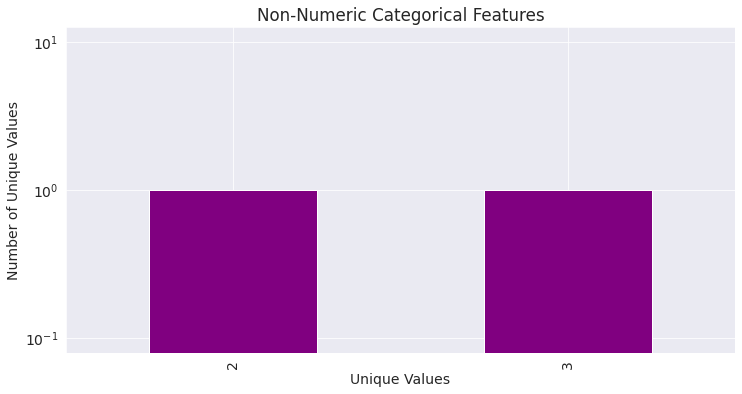

In [15]:
non_num_uniq_vals.value_counts().plot.bar(logy=True, figsize=(12,6),title='Non-Numeric Categorical Features',xlabel='Unique Values',ylabel='Number of Unique Values',color='purple');

From the above outputs, `IsHoliday` has exactly $2$ unique values and `Type` has exactly $3$ unique values. The plot shows the number of features of the dataset that had $2$ and $3$ unique values.

Below, `describe()` method is used to get the statistics summary of the non-numeric features. 

From the summary, the top value of `IsHoliday` is `False`. This value occurred in $391,909$ observations which is in line with reality. The top value of the `Type` feature is `A`. This suggests that the stores consists of mainly type A. More on this will be covered during the analysis.

In [16]:
df.describe(exclude=['datetime','number'])

,IsHoliday,Type
count,421570,421570
unique,2,3
top,False,A
freq,391909,215478


The statistics summary summaries this section. There is an ample knowledge of how the categorical features are structured. Next up is investigation of numerical features of the dataset.

#### Numerical Features Investigation

As was seen earlier, the dataset is characterised by not so much of numerical features. In this section, their structures will be veiwed statistically to get a little insight into their respective dispersions and their positioning.

The investigation is started off by calling the pandas' `describe()` function on `df` in which the `datetime` object is treated as a numeric feature. 

In [17]:
df.describe(datetime_is_numeric=True)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,2011-06-18 08:30:31.963375360,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,44.260317,15981.258123
min,1.000000,2010-02-05 00:00:00,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,2010-10-08 00:00:00,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,2011-06-17 00:00:00,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,2012-02-24 00:00:00,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,2012-10-26 00:00:00,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,99.000000,693099.360000
std,12.785297,NaN,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,30.492054,22711.183519


From the summary above, the non-null values count, mean, minimum, first quartile, second quartile, third quartile, maximum and standard deviation values are provided for each of the numerical features. 

There will be no need at this moment to take to heart all the information that were displayed since there is room for univariate anaylsis later on. However, only abnormalities and major characteristics will be noted. Speaking of characteristics, the dataset consists of $45$ stores. For now, it is safe to say that some stores have up to $99$ departments. The markdown counts indicate a lot of missing values. Kind of weired is the minimum weekly sales value which is negative. This will be investigated in the section of univariate analysis for the sake of organisation. Worth noting as well, is that the record at hand is from $5$th of February, $2010$ till $26$th of October, $2012$.

Now, It may be interesting to note the number of unique values of the each of the numeric features. This will also be done through the help of pandas' `select_dtypes()` function in which only numbers are included.

In [106]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()
unique_values

Year                 3
Month               12
Size                40
Store               45
Week                52
MarkDown2           71
Dept                81
Unemployment       332
MarkDown3          489
MarkDown4          815
Fuel_Price         892
MarkDown1         1484
MarkDown5         1719
CPI               2145
Temperature       3527
Weekly_Sales    324039
dtype: int64

Most of the features have few uniques values since the data frame cut across all the $45$ stores and $99$ departments for approximately $3$ years.

Below, the number of unique values per feature is graphed which depicts weekly sales as the feature with the maximum number of unique values and as a result puts the dataset into a realistic form.

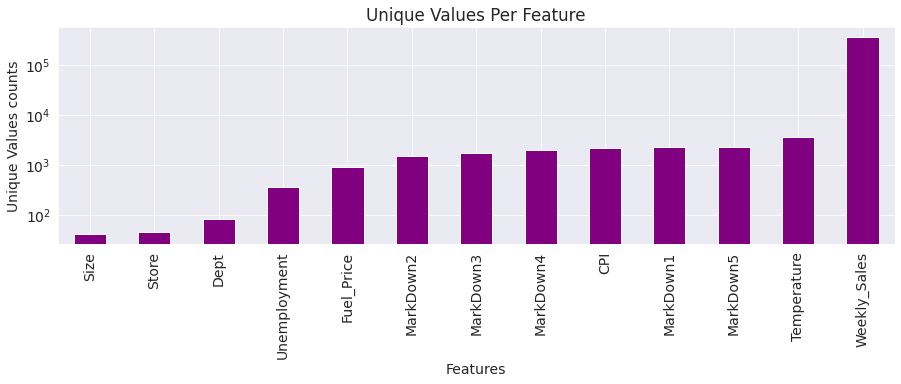

In [19]:
unique_values.plot.bar(logy=True, figsize=(15,4), title='Unique Values Per Feature',xlabel='Features',ylabel='Unique Values counts', color='purple');

The above plot brought the quantitative investigation to an end. The next section is the qualitative investigation.

### Qualitative Investigation

In this section, the quality of the dataset is checked. This involves checking the missing values and deciding what to do about them and also looking out for duplicated values.

#### Null Values

From the previous section, it is clear that there are null values in the dataset which are represented by`NaN`. Indirectly, it is clear that they are all contained within the markdown features and in alarming amount.

Below, the null values will be summarised with pandas' `isnull()` function.

In [104]:
df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Dept            0
Weekly_Sales    0
Year            0
Month           0
Week            0
dtype: int64

Those numbers above are huge! In the next cell, the numbers will be expressed in percentages.

In [22]:
df.isnull().sum()/df.shape[0]*100

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Dept             0.000000
Weekly_Sales     0.000000
dtype: float64

The null values are way beyond the half of the entries per feature where they occured. 

Next cell visualises the null values graphically using the missingno's function `matrix()`.

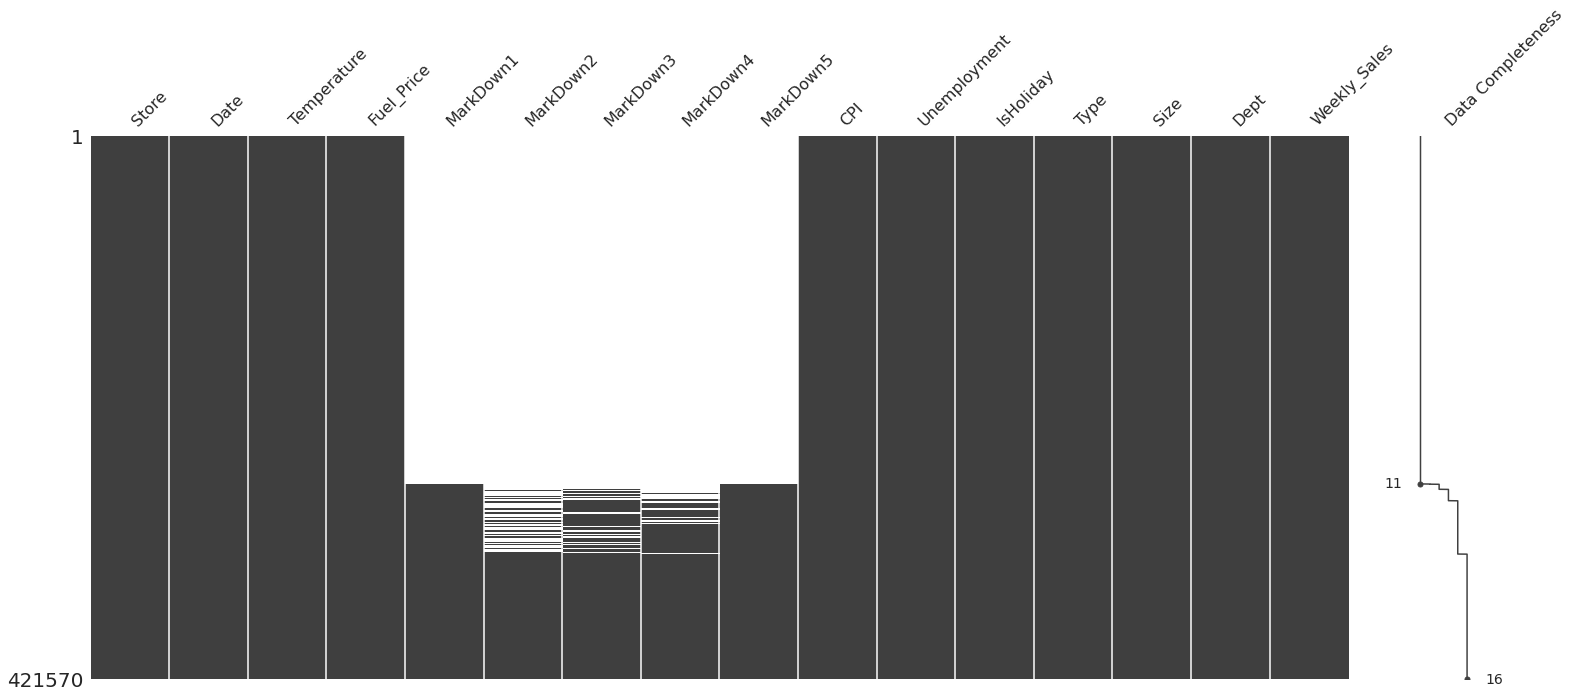

In [23]:
msno.matrix(df, labels=True,sort='ascending');# The white spaces represent missing values

On a very good day, dropping these features would be the best option since more than half of the data are missing. The option to drop the features is beyond our grasp since it was stated that these features affect sales. Also note that the markdowns are not on throughout the year. There is a limited information to aid decision here but for the analysis to go on, the missing values will be filled with $0$. This is done in the next cell.

In [24]:
df = df.fillna(0)

#### Duplicated Observation

In this part, the dataset is checked for repeated observations that where included  due to error while recording.

This will be done through the use of pandas' function, `duplicated()`. Along side with `duplicated()`, will be the `sum()` function to sum up the boolean values that would be returnded by the function `duplicated()`.

In [20]:
df.duplicated().sum()

0

Fortunately, there is no duplicated value.

The final stage of this section is feature enginering.

### Feature Engineering

The entire dataset has been observed and the key properties noted. The dataset has some interesting features out of which the `Weekly_Sales` shall serve as the *target variable*. The weekly sales were collected across several departments of several stores of different types for a period of nearly three years. In the subsequent sections, experinements will be performed to see how the weekly sales were spread across the three years interval. To effectively do this, the need to add some features arises. 

The features that will be added will come from the already existing `datetime` object. The new features will include the months and the weeks of the year each record was taken. These will help in looking across the spread of sales through months and weeks of the year. The following cell gets the job done.

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Week'] = pd.DatetimeIndex(df['Date']).week

This conludes the phase of data cleaning and preparation.
The dataset is ready for more and deeper exploration.

## Exploratory Analysis and Visualization.

This part of the analysis is where time is spent in exploring the dataset using different strategies. Each of the features  - especially the target variable - is explored deeper to understand how the its values are distributed. 

The outline for this section are as follows:
* Univariate Analysis: Here, each feature will be statistically summarised and the distribution plotted in order to study how the values are distributed.
* Bivariate Analysis: The dependent variable will be studied in relation to all the individual independent variables to see how they are related.
* Multivariate Analysis: Lastly, the a general veiw of the relationships within the various numerical features of the entire dataset will be visualised.

As the different stages of analysis are carried out, insights will be drawn from the dataset as questions that will be answered through some lines of codes that will display graphes that answer the questions.

### Univariate Analysis

The categorical features are analyzed before the numerical features

#### Categorical features.

##### Store Type

Here the store types are examined to understand how they are distributed across the observations. Before now, it was uncovered that they are three categories within this which are: 'A', 'B' and 'C'. 
 
To know how the store types are distributed across the dataset, the pandas' function `value_counts()` was called. 
>In the rest of the sections, ordinary weeks or ordinary days is used to refer to weeks without a hoilday or days that are not holidays.


In [25]:
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

Bulk of the records consist of store type 'A' followed by store type 'B' and lastly, store type 'C'.

A bar chart of the total record of each store type is plotted below.

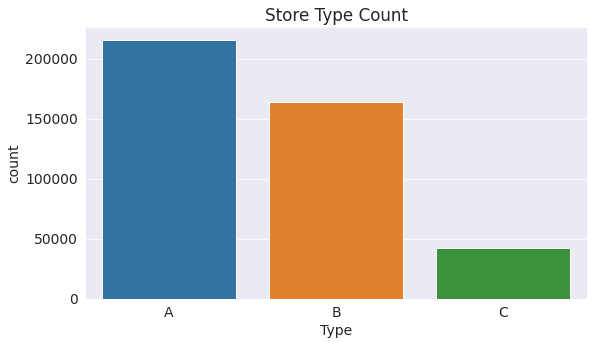

In [26]:
plt.title('Store Type Count')
sns.countplot(x=df['Type']);

##### Whether there was a holiday on the week of the record or not

The next category is the `IsHoliday` which contains boolean values. This category has `True` if there was a holiday during the week and `False` if otherwise.

In [ ]:
 df['IsHoliday'].value_counts()

Just as expected! A typical year is made up of few holidays and numerious ordinary days. The output shows that more than $390,000$ observations were taken on ordinary weeks and less that $30 000$ observations were recorded in holiday weeks.

The next lines of codes plot the data above in a bar chart.

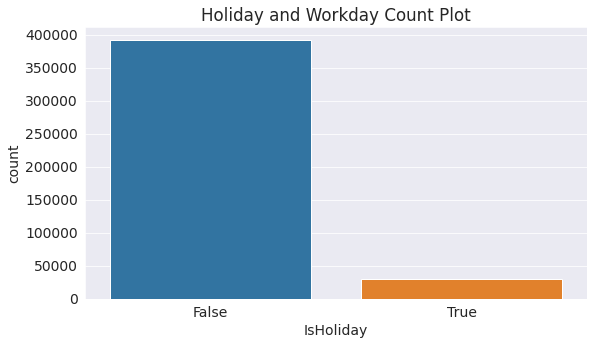

In [28]:
plt.title('Holiday and Workday Count Plot')
sns.countplot(x=df['IsHoliday']);

#### Numerical Features

Numerical features are handled differently, the approach is to analyze the features one after the other by displaying the statistics summary of the each of them after which the distribution together with the kernal density of each are plotted with `bins` of $54$. However, since there are much but not so much of numerical features, it will be tiring to do the this one after the other. Another challenge that may be experienced is in reading through a lengthy project. a0An option to tackle this is to use `pairplot()` function from seaborn but this will alter the organization of the project since the function will perform a multivariate anslysis of the features. To make it brief anf follow the laid down structure that was outlined, user defined functions are applied to summaries the statistics of these features and plot the required distributions.

##### Statistics Summary

To get on with this phase, a function `get_stat()` is defined in the next cell to return the statistics summary of the numerical features.

In [29]:
def get_stat(df,x):
    ''' get_stat and a list takes a data frame
    and returns statistics summaries of the
    features in the list x'''
    d = {}
    for i in x:
        d[i] = np.array([df[i].mean(),mode(df[i]),df[i].median(),df[i].min(),df[i].max(),df[i].skew(),df[i].kurt()])
    g=pd.DataFrame(d,index=['mean','mode','median','minimum','maximum','skewness','kurtosis'],columns=x)
    return g

In [30]:
col = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Weekly_Sales']
get_stat(df,col).T

,mean,mode,median,minimum,maximum,skewness,kurtosis
Temperature,60.090059,50.430000,62.09000,-2.060,100.140000,-0.321404,-0.635922
Fuel_Price,3.361027,3.638000,3.45200,2.472,4.468000,-0.104901,-1.185405
MarkDown1,2590.074819,0.000000,0.00000,0.000,88646.760000,4.731304,34.917236
MarkDown2,879.974298,0.000000,0.00000,-265.760,104519.540000,10.645956,145.421293
MarkDown3,468.087665,0.000000,0.00000,-29.100,141630.610000,14.922341,248.095371
MarkDown4,1083.132268,0.000000,0.00000,0.000,67474.850000,8.077666,86.242339
MarkDown5,1662.772385,0.000000,0.00000,0.000,108519.280000,9.964519,183.408065
CPI,171.201947,129.855533,182.31878,126.064,227.232807,0.085219,-1.829714
Unemployment,7.960289,8.099000,7.86600,3.879,14.313000,1.183743,2.731217
Weekly_Sales,15981.258123,10.000000,7612.03000,-4988.940,693099.360000,3.262008,21.491290


As were seen before, some minimum values of the mardowns and the weekly sales have negative values which look weired. It will make sense to have these values investigated to know if they are error values. This will be done after the distribution plots. From the summary too, some the skewness values and kurtosis values suggest a distributions that are skewed with high peaks rrspectively.

##### Distribution Plot

To verify and be certain, a function `dis_plot()` is defined charged with plotting the distribution with `bins` of $54$ along with the kernal density of each of the numeric features in the next cell.

In [35]:
def dis_plot(df,x):
    '''dis_plot takes a data frame and a list and plots the
    distributions of the data frame's columns whose names 
    are in the list together with their kde'''
    print('\n ----- Distribution Plots ----- \n')
    fig,axes = plt.subplots(5,2,figsize=(20,18))
    a = list(np.arange(5))
    b = list(np.arange(2))
    c = []
    for i in x:
        for j in a:
            for k in b:
                c.append((i,j,k))
                
    d = list(np.arange(len(c)))
    for l in d:
        if l % 11 == 0:
            axes[c[l][1],c[l][2]].set_title(f'Distribution of {c[l][0]}')
            sns.distplot(x=df[c[l][0]],kde=True,bins=int(180/5),color='purple',kde_kws={'linewidth':4},hist_kws={'edgecolor':'black'},ax=axes[c[l][1],c[l][2]])
            plt.tight_layout(pad=2)


 ----- Distribution Plots ----- 



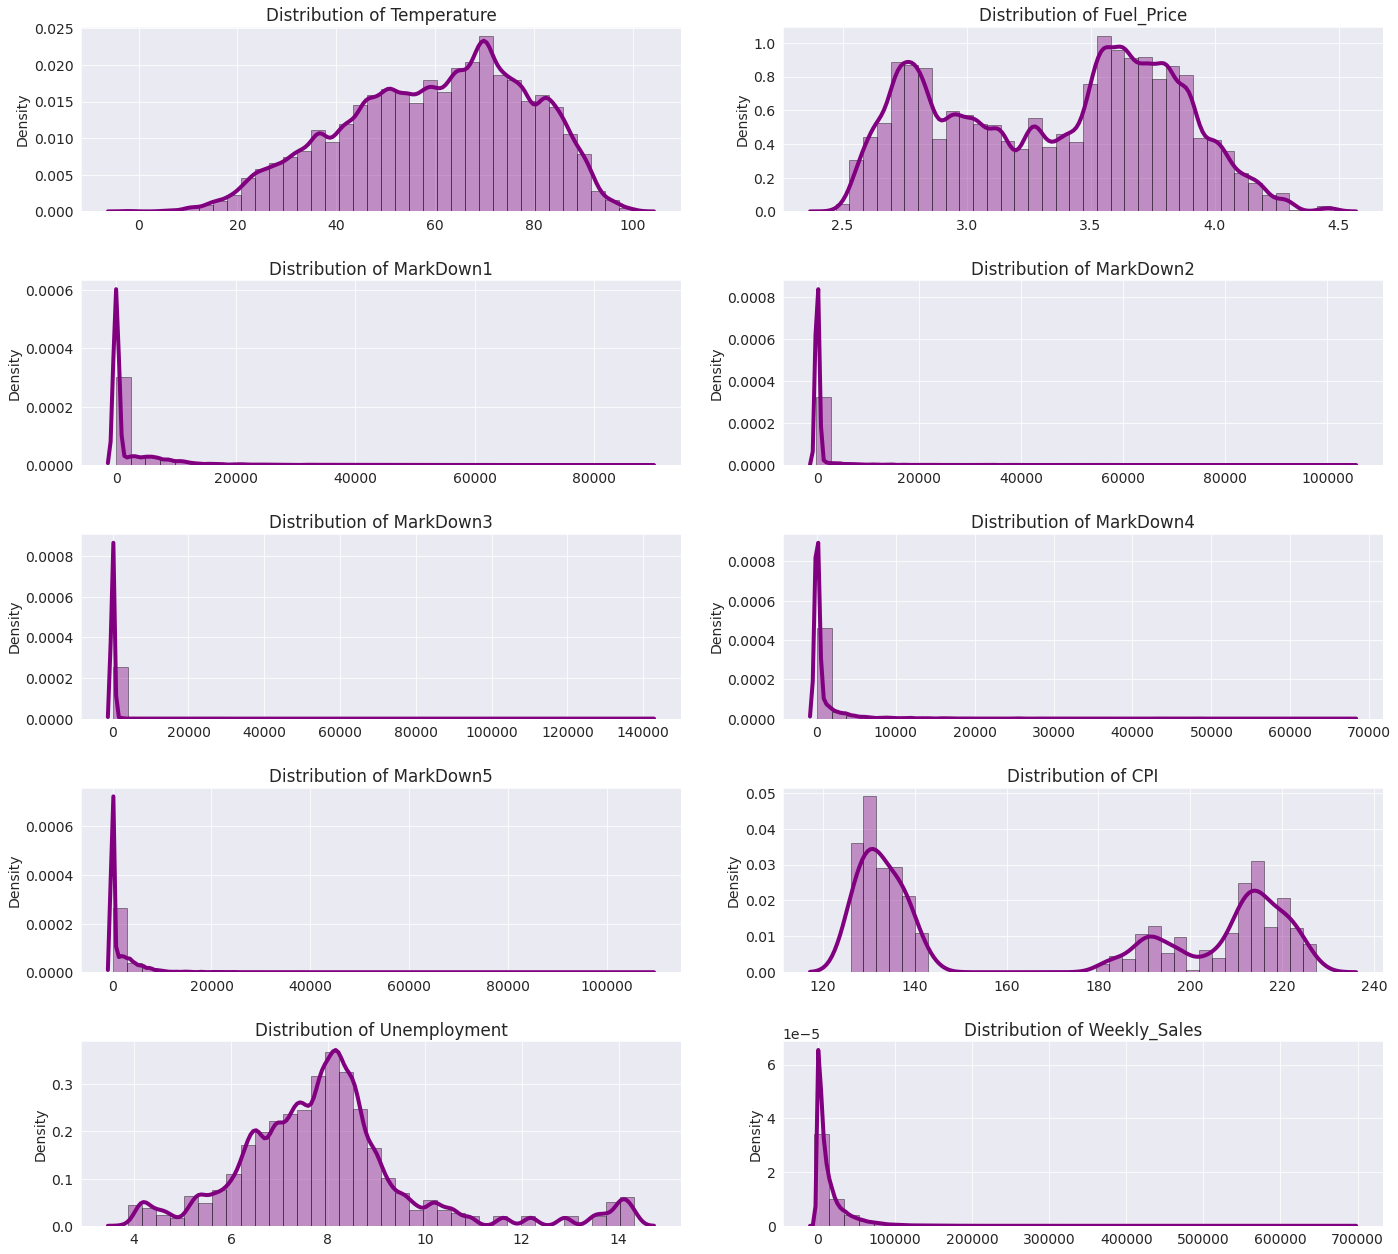

In [36]:
dis_plot(df,col)

To tackle the negative values of the markdowns and the weekly sales, observe that their distributions are skewed heavily to the right with a lot of their values clustered aroumd $0$. This suggests that these features are $C$-deviated values from the actual values for some $C \in ℝ$. It makes sense since the dataset is not dummy.

Observing other features, such as `Temperature`, `Unemployment` and the markdowns and the weekly sales, it is clear that their distributions are normal even though the latter distributions are skewed to the right. It is no surprise because the skews were suggested in the statistics summary.

The distributions of the `CPI` and that of the `Fuel_Price` are not normally distribution.

##### Box Plots

In this part, the features' box plots are plotted to observe the presence of outliers. Definately, there are going to be outliers judging from the skewness of some of the distributions. In the next cell, a function that plots the individual box plots of the numerical features is defined.

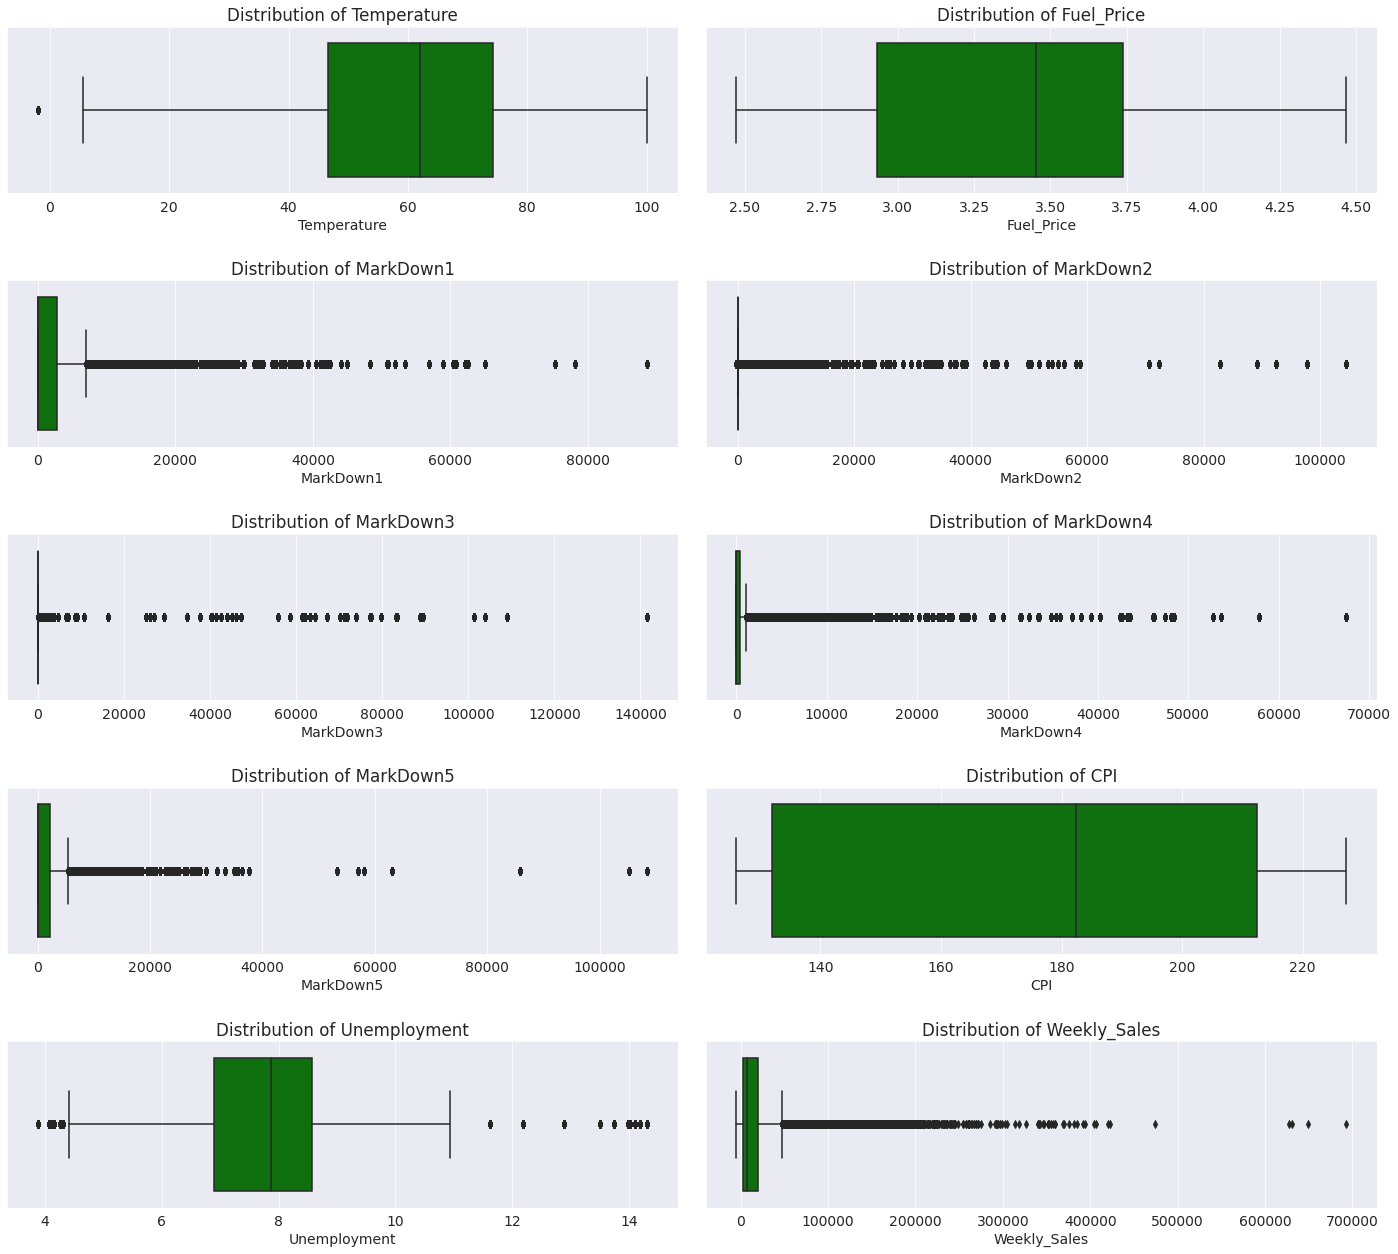

In [39]:
def box_plot(df,x):
    '''box_plot takes a data frame and a list of feature names 
    and plots their box plots'''
    fig,axes = plt.subplots(5,2,figsize=(20,18))
    a = list(np.arange(5))
    b = list(np.arange(2))
    c = []
    for i in x:
        for j in a:
            for k in b:
                c.append((i,j,k))
                
    d = list(np.arange(len(c)))
    for l in d:
        if l % 11 == 0:
            axes[c[l][1],c[l][2]].set_title(f'Distribution of {c[l][0]}')
            sns.boxplot(x=df[c[l][0]],color='green',ax=axes[c[l][1],c[l][2]])
            plt.tight_layout(pad=2)

box_plot(df,col)

For now, the outliers will be untouched.

The box plots concludes the univariate analysis. The distributions have given knowledge of how the different features are distributed.

### Bivariate Analysis

In this phase of the analysis, the relationships that exist between two features are examined. It is necessary to carry out this analysis to understand the features better since some of the features give information about other features in the dataset.

#### Store Types and Stores

The aim here is to know how the store types are related to the stores. That is, to know if a store can be of multiple types or not. To do this, scatter plot is used with `Store` on the $y-axis$ and `Type` on the $x-axis$.

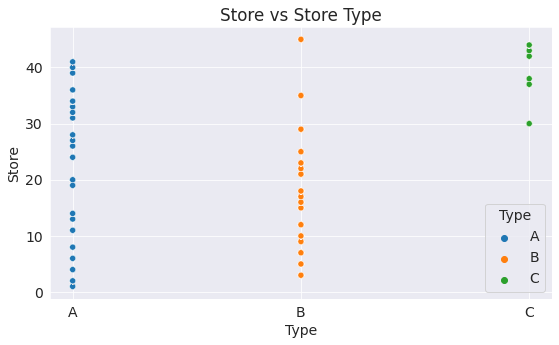

In [40]:
plt.title('Store vs Store Type')
sns.scatterplot(x=df['Type'],y=df['Store'],hue=df['Type']);

As can be seen, the stores do not lap in types that is, a store is either type 'A', type 'B' or 'C'.

#### Store Sizes and Store Types

Here, the aim is to know how the store types differ by size. The scatter plot will be used to assess this relationship.

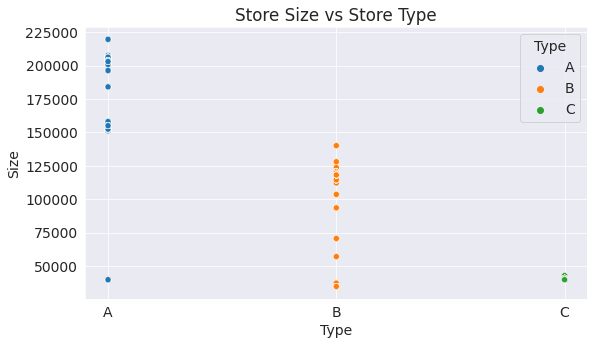

In [41]:
plt.title('Store Size vs Store Type')
sns.scatterplot(x=df['Type'], y=df['Size'], hue=df['Type']);

The stores do not lap in sizes as well. Generally, type 'A' stores have the highest store sizes followed by 'B' and then 'C'. However, There seem to be type 'A' and type 'B' stores that are below their cluster in size. But looking closely, there is no lapping amongst the three types. For that reason (since there is no other place to look for explanation) the analysis will go on.

#### Weeks of the Year and Holidays

Here too, `Week` is plotted on the $y-axis$ and `IsHoliday` plotted on the $x-axis$ of a scattter plot to gurage how holiday weeks and ordinary weeks spread in the weeks of the year. 

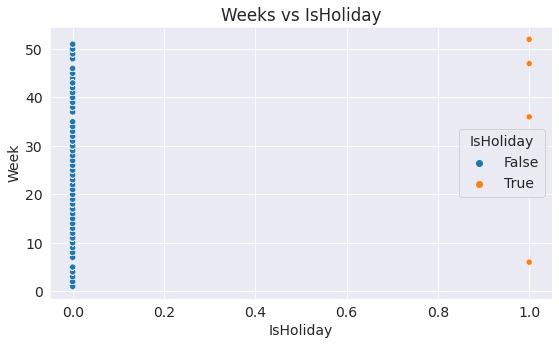

In [45]:
plt.title('Weeks vs IsHoliday')
sns.scatterplot(y=df['Week'], x=df['IsHoliday'],hue=df['IsHoliday']);

From the plot, only four weeks out of the 54 weeks of the year have holidays.

#### Months of the Year and Holidays

The months of the year is plotted against ordinary and holidays weeks in a year in a scatter plot. The plot should show the months with holidays and ordinary weeks.

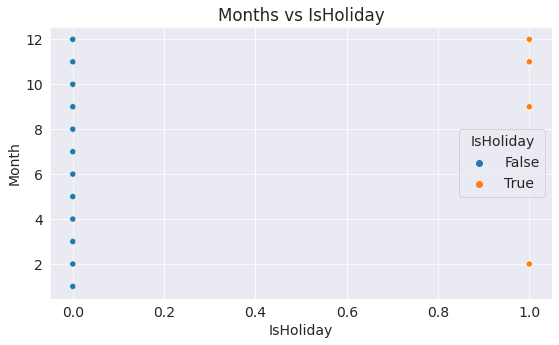

In [46]:
plt.title('Months vs IsHoliday')
sns.scatterplot(x=df['IsHoliday'],y=df['Month'],hue=df['IsHoliday']);

From the above scatter plot, there are four months with holidays. There include: February, September, November and December. Notice also that the last three holidays tend to cluster towards the end of the year.

#### Spread of Continous Features Along The Index of The Data Frame

The clustering of the countinous features along the data frame's index is observed. This will be done by plotting the continous features against the index of the data frame in a scatter plot. To do this, a function - `spread()` is defined in the next cell.

In [ ]:
def spread(df,x):
    '''spread takes a data frame and a list containing feature
    names and plots the features against the data framesps index 
    in a scatter plot'''
    print('\n ----- Spread of the Features -----\n')
    fig,axes = plt.subplots(5,2,figsize=(20,18))
    a = list(np.arange(5))
    b = list(np.arange(2))
    c = []
    for i in x:
        for j in a:
            for k in b:
                c.append((i,j,k))
                
    d = list(np.arange(len(c)))
    for l in d:
        if l % 11 == 0:
            axes[c[l][1],c[l][2]].set_title(f'Spread of {c[l][0]}')
            sns.scatterplot(x=df.index,y=df[c[l][0]],color='purple',ax=axes[c[l][1],c[l][2]])
            plt.tight_layout(pad=2)


 ----- Spread of the Features -----



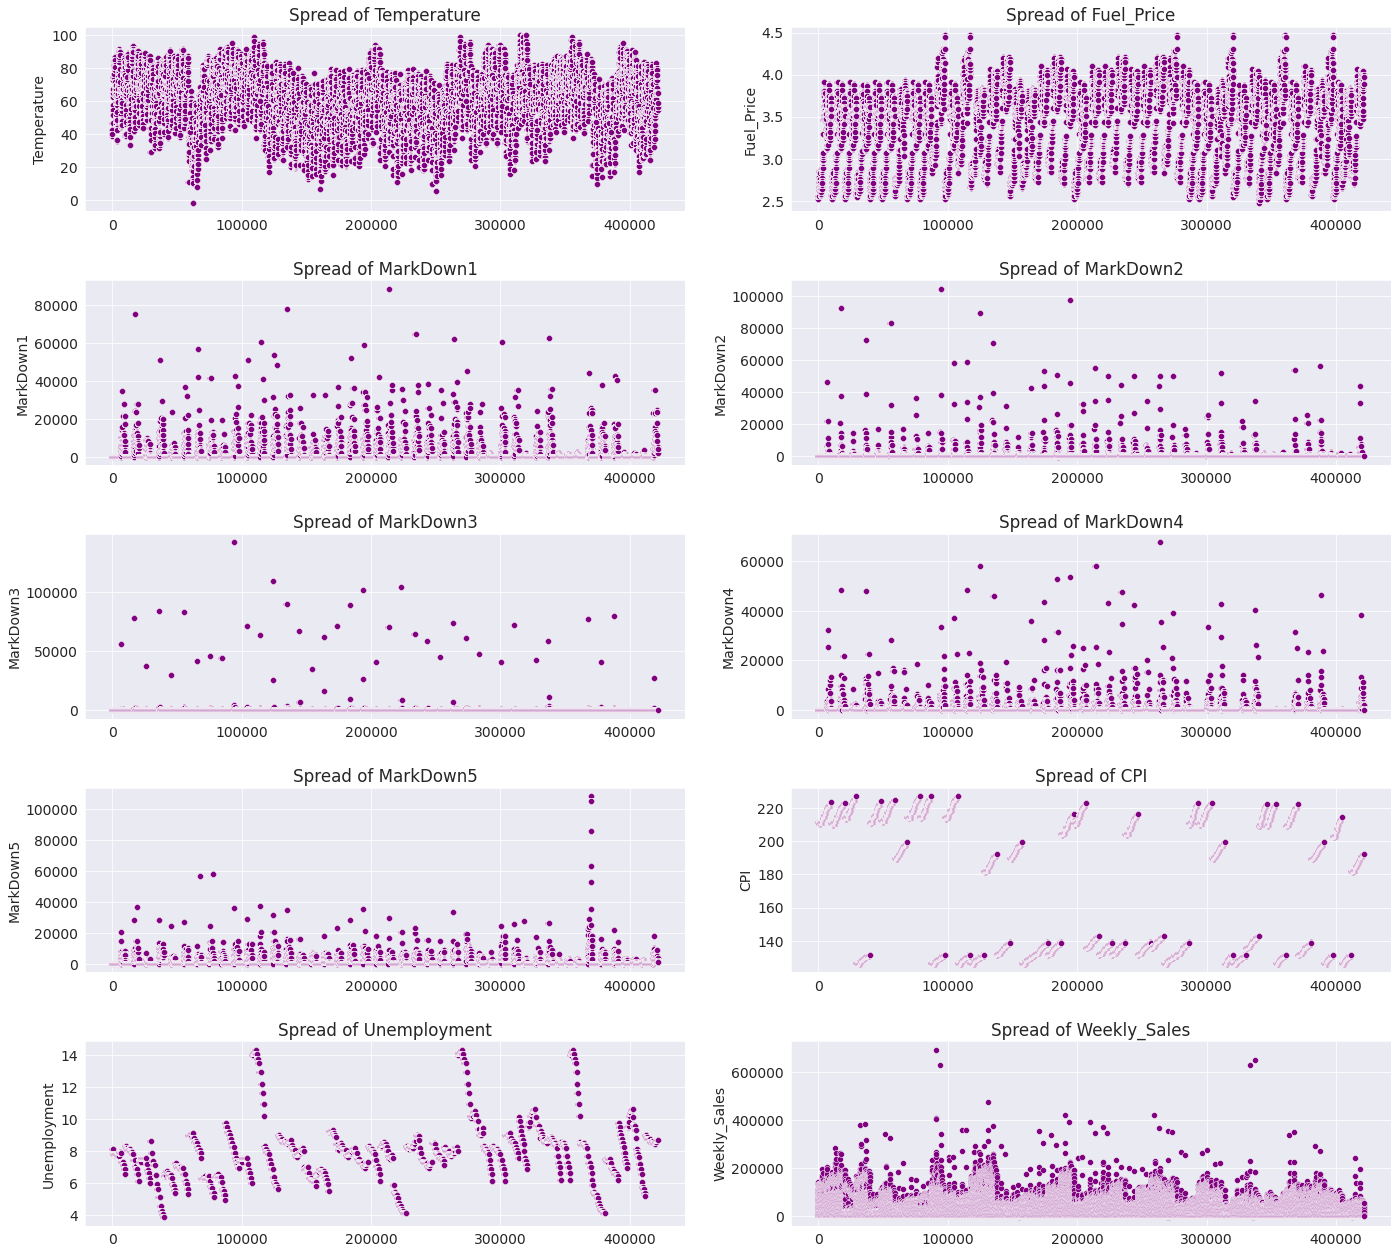

In [49]:
spread(df,col)

The above subplots show how the countinous features are distributed along the data frame's index.

The relationships between the weekly sales and the rest of the continous and some of the discete features will be explored in the next cells. A function that plots the relationships in the form of scatter plots is defined. 

In [50]:
def scatter_plot(df,x):
    '''scatter_plot takes a data frame and a list
    of features and plots the Weekly_Sales against the features in 
    a scatter plot'''
    print('\n---- Correlation Plot of Weekly_Sales -----\n')
    fig,axes = plt.subplots(6,2,figsize=(20,18))
    a = list(np.arange(6))
    b = list(np.arange(2))
    c = []
    for i in x:
        for j in a:
            for k in b:
                c.append((i,j,k))
                
    d = list(np.arange(len(c)))
    for l in d:
        if l % 13 == 0:
            axes[c[l][1],c[l][2]].set_title(f'Weekly_Sales vs {c[l][0]}')
            sns.scatterplot(y=df['Weekly_Sales'],x=df[c[l][0]],color='purple',ax=axes[c[l][1],c[l][2]])
            plt.tight_layout(pad=2)


---- Correlation Plot of Weekly_Sales -----



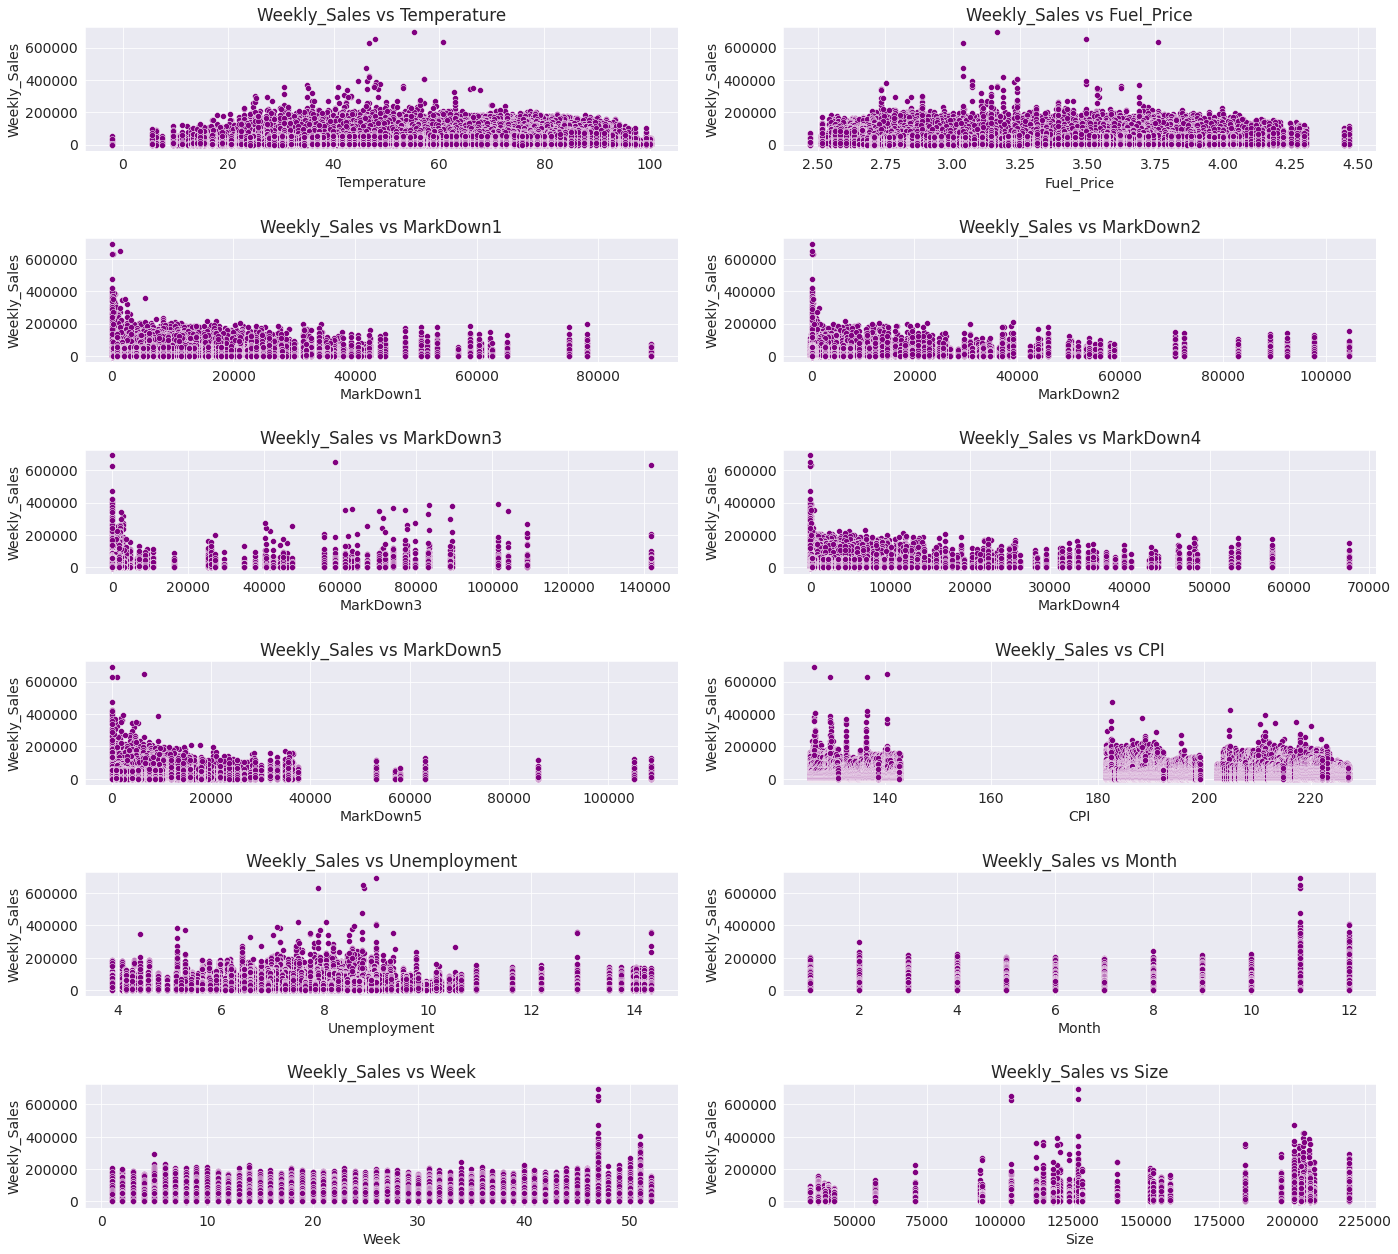

In [51]:
cont_col = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Month','Week','Size']
scatter_plot(df,cont_col)

There seem to be no relationship between the weekly sales and and the rest of the continous features apart from store size. This might be due to the presence of outliers in the dataset. The relationship shall be examined again during the multivariate analysis when the outliers must have been improved on.

Now, the target varible - weekly sales - is analyzed. The annual weekly trend will be examined to assess the sales performance.

#### Weekly Sales

Below, the weekly sales is grouped by year and summed to see the sales trend over the period of the three years.

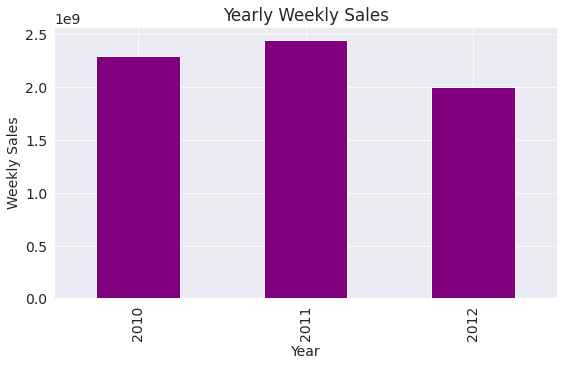

In [55]:
df.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar', color='purple',ylabel='Weekly Sales',xlabel='Year',title='Yearly Weekly Sales');

The stores recorded growth in sales between $2010$ and $2011$ and a fall in the year $2012$. This leads to the first question of the analysis:

**Q1: Why was there a drop in yearly sales for the year 2012?**

To answer this question, the data frame is querried for the observation entries corresponding to the year in question.

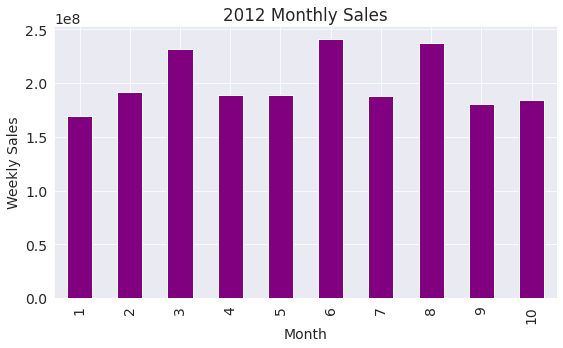

In [56]:
df_2012 = df[df['Year'] == 2012]
df_2012.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar',color='purple',title='2012 Monthly Sales',ylabel='Weekly Sales');

From the bar chart above, only sales for ten months of the year were recorded. This calls to mind that the observations presented in the dataset were collected from $5th$ February, $2010$ to $26th$ October, $2012$. So, as at the time of the data documentation, the sales data for the rest of the year were not ready.

In the next cell, the code output shows that there were only $43$ weeks sales record avaliable for the year $2012$.

In [42]:
df_2012['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43])

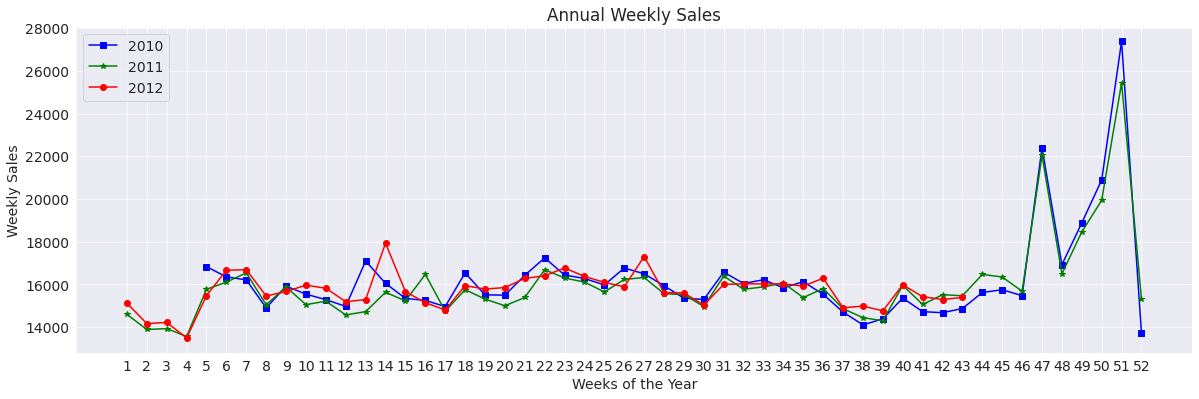

In [73]:
Sales_2010 = df[df['Year'] == 2010].groupby('Week')['Weekly_Sales'].mean()
Sales_2011 = df[df['Year'] == 2011].groupby('Week')['Weekly_Sales'].mean()
Sales_2012 = df[df['Year'] == 2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(20,6))
plt.title('Annual Weekly Sales')
plt.xlabel('Weeks of the Year')
plt.ylabel('Weekly Sales')
plt.xticks(np.arange(1,53))
plt.plot(Sales_2010.index,Sales_2010.values,'s-b')
plt.plot(Sales_2011.index,Sales_2011.values,'*-g')
plt.plot(Sales_2012.index,Sales_2012.values,'o-r')
plt.legend(['2010','2011','2012']);

 **Q2: How does holidays affect weekly sales?**
 
 To answer this question, the data frame is grouped by `IsHoliday` while `Weekly_Sales` is referenced and summed, displayed and plotted to see how the sales come in during ordinary weeks and holiday weeks.

In [70]:
IsHoliday_sales = df.groupby('IsHoliday')['Weekly_Sales'].sum()
IsHoliday_sales

IsHoliday
False    6.231919e+09
True     5.052996e+08
Name: Weekly_Sales, dtype: float64

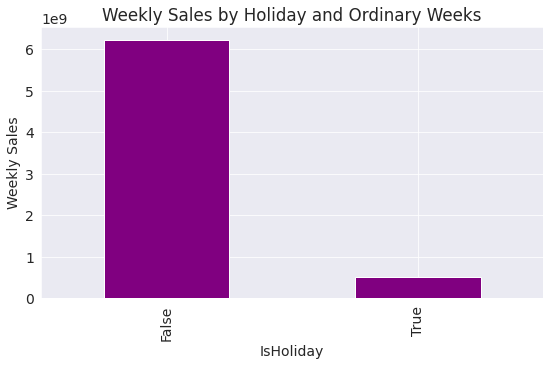

In [71]:
plt.title('Weekly Sales by Holiday and Ordinary Weeks')
IsHoliday_sales.plot(kind='bar',color='purple',ylabel='Weekly Sales');

As expected, the bulk of the weekly sales come in during ordinary weeks. In the next cell, the average weekly sales for ordinary weeks and holiday weeks will be plotted to see how they vary.

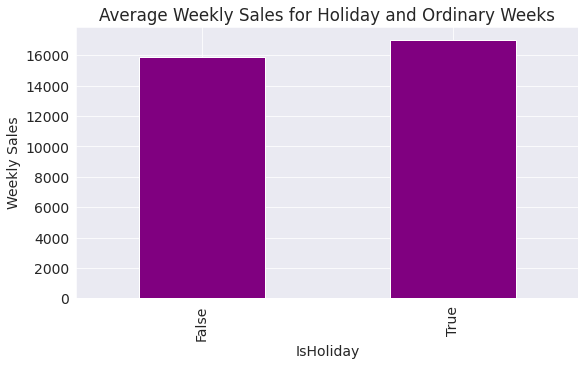

In [72]:
df.groupby('IsHoliday')['Weekly_Sales'].mean().plot(kind='bar',color='purple',title='Average Weekly Sales for Holiday and Ordinary Weeks',ylabel='Weekly Sales');

Even though the bulk of the weekly sales are returned during ordinary weeks, the average weekly sales during holiday weeks are higher compared to that of workdays.

**Q3: Which of the weeks have the highest weekly sales during holodays?**

There are only few weeks that have holidays in them. Here, average weekly sales are plotted against those weeks to know which of them return the highest average weekly sales.

In [75]:
holiday_sales = df[df['IsHoliday'] == True]
holiday_sales.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False)

Week
47    22220.944538
6     16377.996441
36    15881.693339
52    14543.387158
Name: Weekly_Sales, dtype: float64

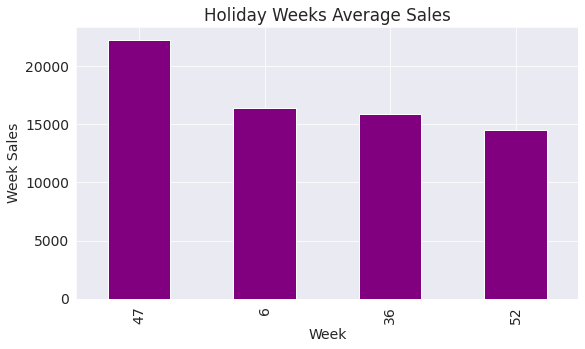

In [76]:
holiday_sales.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False).plot(kind='bar',color='purple',title='Holiday Weeks Average Sales',ylabel='Week Sales');

The $4th$ week of November returns the highest average weekly sales during holidays.

**Q4: What are the top ten months with the highest average weekly sales?**

Due to how the holiday weeks clustered towards the end of the year and the nature of the holidays in those months, this question will reveal how weekly sales for those months were affected by holidays. 

The data frame is grouped by `Month` while `Weekly Sales` is referenced and averaged.

In [77]:
df.groupby('Month')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)

Month
12    19355.702141
11    17491.031424
6     16326.137002
8     16062.516933
2     16008.779217
7     15861.419650
5     15776.337202
4     15650.338357
3     15416.657597
10    15243.855576
Name: Weekly_Sales, dtype: float64

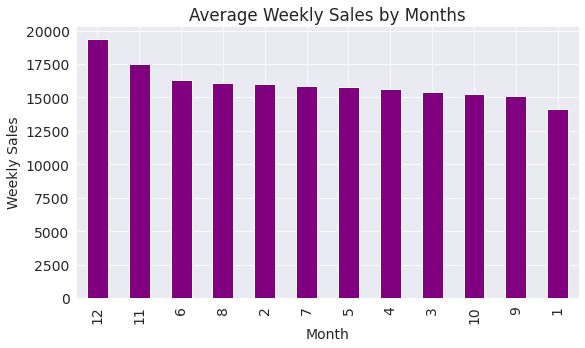

In [78]:
df.groupby('Month')['Weekly_Sales'].mean().sort_values(ascending=False).plot(kind='bar',color='purple',title='Average Weekly Sales by Months',ylabel='Weekly Sales');

Just As expected, the last two months of the year are the two months with the highest weekly sales average. This ranks the holidays that come towards the end of the year higher. 

**Q5: What store types have the highest average weekly sales during holidays?**

Since the store types do not lap, it will be important to know the store types that return the highest average weekly sales. The answer to this question will help in knowing which store types to priotise during holidays.

In [79]:
by_type=holiday_sales.groupby('Type')['Weekly_Sales'].mean().sort_values(ascending=False)
by_type

Type
A    21297.517824
B    13346.164062
C     9532.963131
Name: Weekly_Sales, dtype: float64

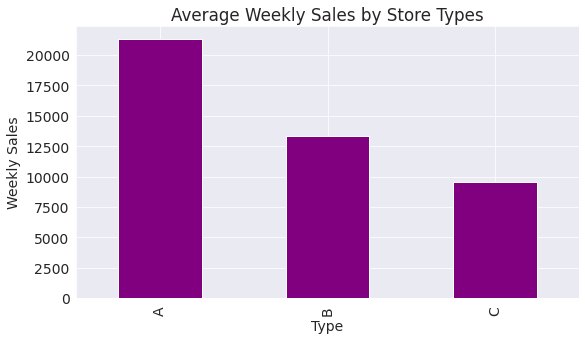

In [80]:
by_type.plot(kind='bar',color='purple',title='Average Weekly Sales by Store Types',ylabel='Weekly Sales');

Type 'A' stores return the highest average weekly sales during holidays. 

**Q6: What stores have the highest average weekly sales during holidays?**

Even though type A stores return the highest weekly sales average, it is worth knowing those exact stores.

In [81]:
by_store = holiday_sales.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
by_store

Store
20    31106.985906
4     30854.231417
14    30164.765263
10    29195.524157
2     28798.710526
13    28593.285602
27    26318.487872
6     23313.563481
1     23039.386667
39    22254.339742
Name: Weekly_Sales, dtype: float64

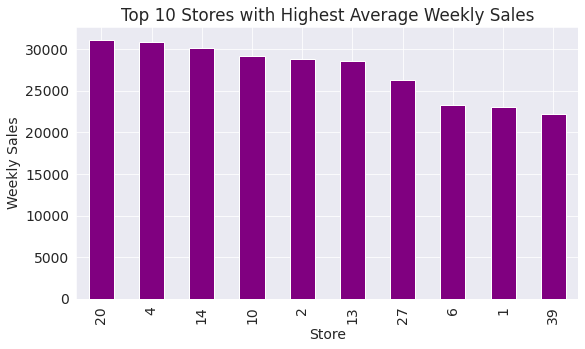

In [82]:
by_store.plot(kind='bar',color='purple',title='Top 10 Stores with Highest Average Weekly Sales',ylabel='Weekly Sales');

The bar chart above shows the first 10 stores that return the highest average weekly sales.

**Q7: What are the departments with highest weekly sales during holidays?**

During these holidays, there are departments that perform better than the others. 

In [83]:
by_department = holiday_sales.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
by_department

Dept
72    94855.542259
92    79323.104667
95    66658.296444
38    57071.656822
90    47131.396044
40    44424.685733
2     42203.264267
65    40276.493000
91    33354.491933
5     32386.823702
Name: Weekly_Sales, dtype: float64

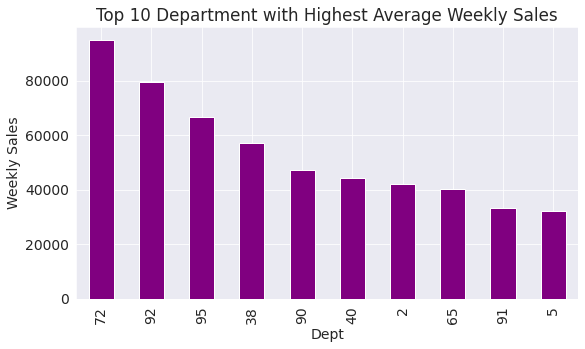

In [84]:
by_department.plot(kind='bar',color='purple',title='Top 10 Department with Highest Average Weekly Sales',ylabel='Weekly Sales');

From the bar chat above, department 72, 92, 95 and 38 are the  departments that perform better than the rest during holidays. 

**Q8: What store sizes have the highest weekly sales during holidays?**

Here, it is expected that the stores with the biggest store sizes should all be here. If possibles, they should be in order of sizes.

In [88]:
by_size=holiday_sales.groupby('Size')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
by_size;

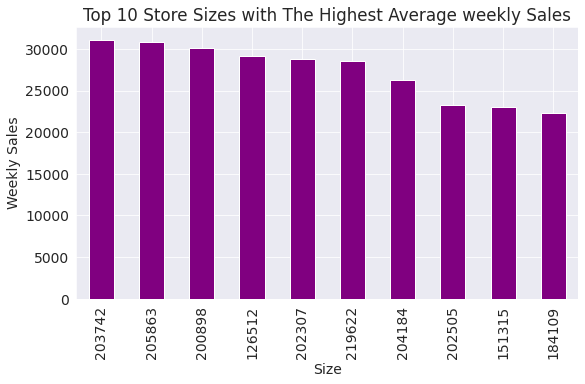

In [87]:
by_size.plot(kind='bar',color='purple',title='Top 10 Store Sizes with The Highest Average weekly Sales',ylabel='Weekly Sales');

Relatively, the bar chart is characterised by the stores with the largest sizes but there are not in order of magnitude by size. The may be due to demographic factors.

**Q9: How is the weekly sales affected by the rest of the features?**

### Multivariate Analysis

This question will be answered with multivariate analysis. The answer to this question will show the correlation of the weekly sales and the rest of the features. The correlation will be shown in a heatmap. 

Before showing the relationships, it is necessary to handle the outliers in the dataset. Below, a function that handles outliers is defined and called to accommodate the outliers in the dataset as the medians.

In [90]:
def outlier_detect(df,y):
    for x in y:
        Q1=df[x].quantile(0.25)
        Q3=df[x].quantile(0.75)
        IQR=Q3 - Q1
        LTV=Q1 - (1.5 * IQR)
        UTV=Q3 + (1.5 * IQR)
        df[x] = np.where(df[x] < LTV, df[x].median(),df[x])
        df[x] = np.where(df[x] > UTV, df[x].median(),df[x])
    return df
columns = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Unemployment','CPI','Dept','Size','Weekly_Sales']

df = outlier_detect(df,columns)

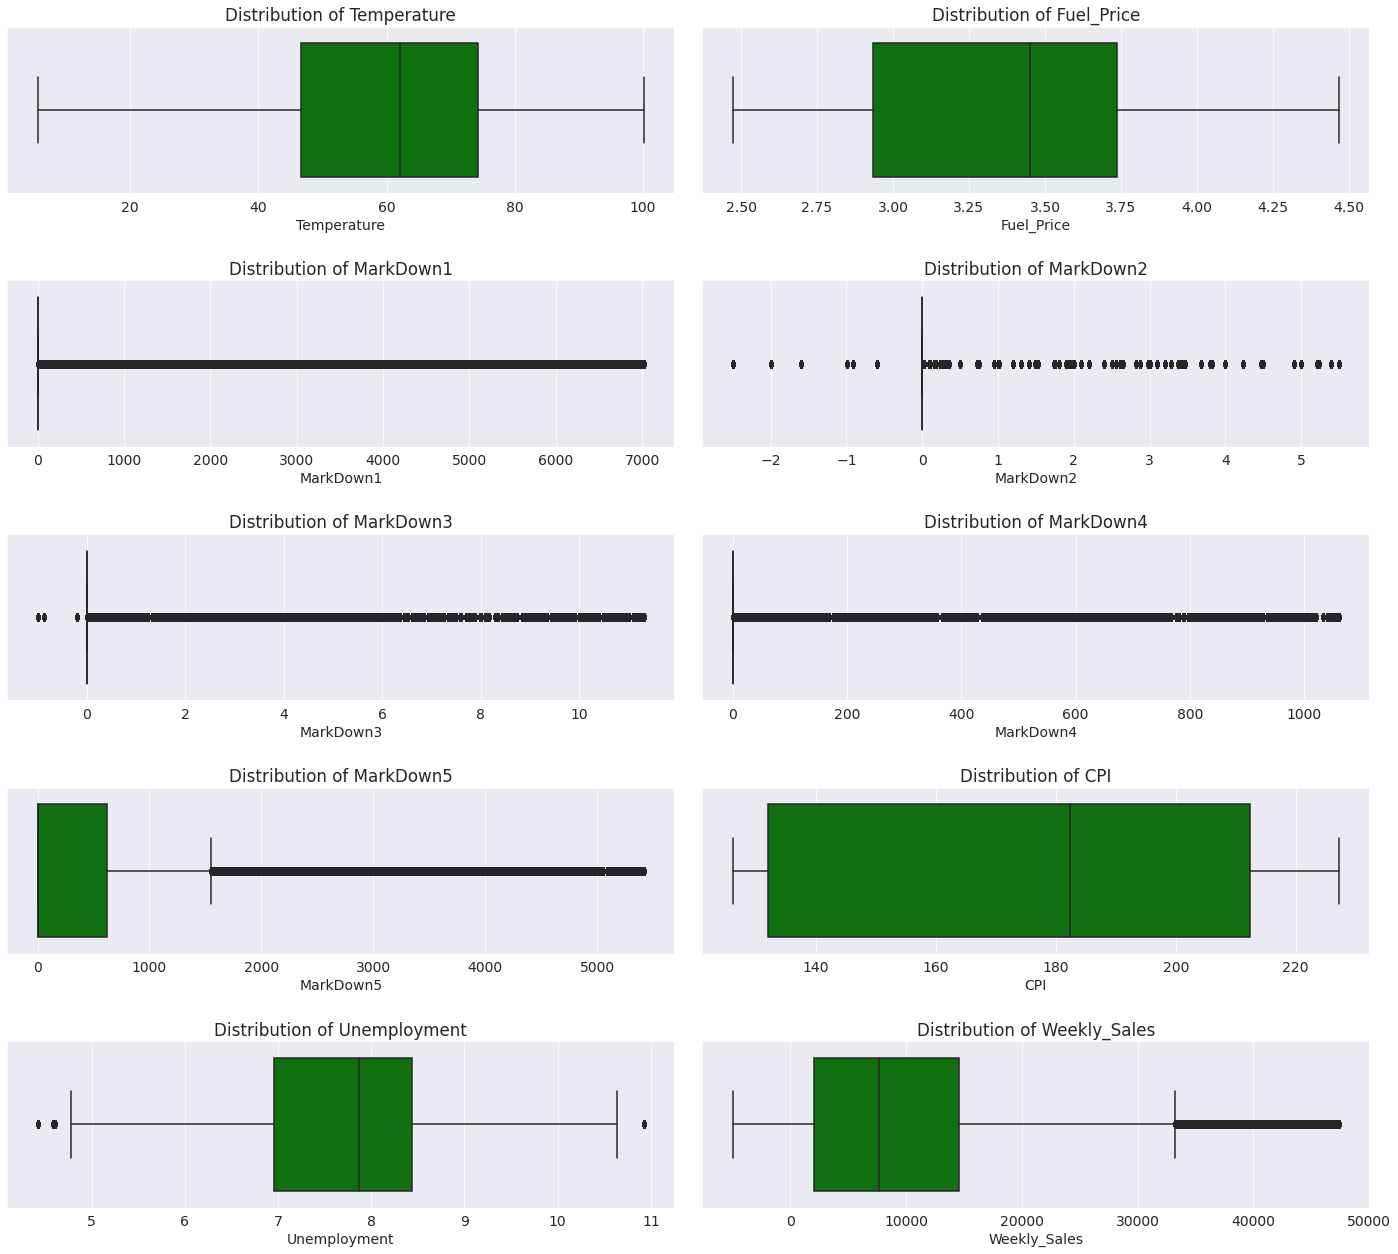

In [91]:
box_plot(df,col)

In the above cell, the box plots are plotted again to see the extent to which the dataset was improved with respect to outliers. Some of the features improved


>⚠️It is good practice to improve the dataset outlier-wise by running the `outlier_detect()` more than once but due to the limited markdown data, it is not wise to run the function more than once. Running it more than once will append $0$ to almost all the values of the markdowns.

Below is the code block that plots the correlation between the features and the target feature in a heatmap. The heatmap is deplayed after this code block. Before the heatmap, be reminded that correlation coefficient $\rho$ is a real number laying between -1 and 1. The interpretation follows below. 

**Interpreting the value of $\rho$**

+ 0.9 to 1 positive or negative indicates a very strong positive or negative correlation respectively.
+ 0.7 to 0.9 positive or negative indicates a strong positive or negative correlation respectively.
+ 0.5 to 0.7 positive or negative indicates a moderate positive or negative correlation respectively.
+ 0.3 to 0.5 positive or negative indicates a positive or negative weak correlation respectively.
+ 0 to 0.3 positive or negative indicates a negligible positive or negative  correlation respectively.

The heatmap shows relationships between the independent varibales and the dependent variable. The causation correlation between store size and weekly sales in negligible. It is not enough to conclude that a increase in store size drives sales up.

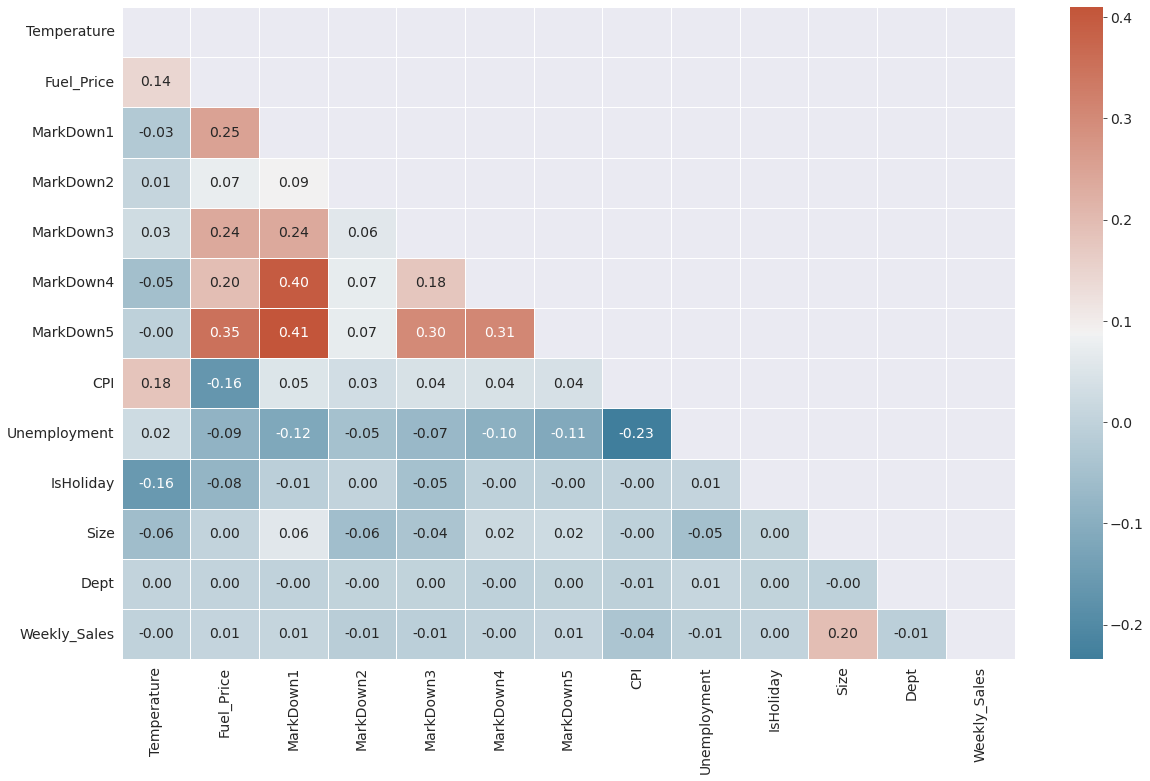

In [92]:
sub_df =df[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales']] 
plt.figure(figsize=(20,12)) 
corr = sub_df.corr() 
mask = np.triu(np.ones_like(corr,dtype=bool)) 
cmap = sns.diverging_palette(230,20,as_cmap=True) 
sns.heatmap(corr,mask=mask,linewidths=1,cmap=cmap,annot=True,fmt='.2f');

Below, scatter plot will be plotted to justify that the correlation is not enough to assert causation.

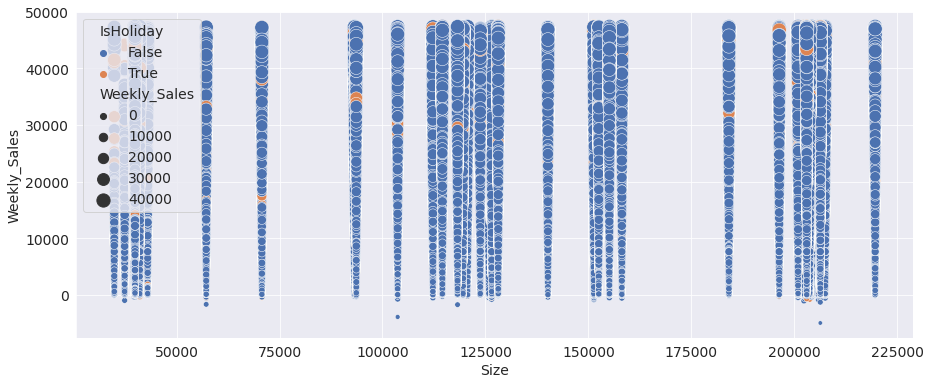

In [94]:
plt.figure(figsize=(15,6))
plt.title('Correlation Plot of Store Size and Weekly Sales')
sns.scatterplot(x=df['Size'], y=df['Weekly_Sales'], hue=df['IsHoliday'],size=df['Weekly_Sales'],sizes=(20, 200), palette="deep", legend="auto");

In [121]:
df[['Date','Week','Month','Type','Store','Dept','Size','IsHoliday','Weekly_Sales']].to_csv('Walmart.csv',index=False)

## Inferences and Conclusion.

Throughout this notebook, thorough exploratory data analysis was carried out on the Walmart datsets. Even though this analysis was not intended for the competition, the analyst (author) found it interesting and as such delved into exploring it to uncover hidden insights from the data that answered different questions. At the end of the analysis, a hand full of insights that will aid in model building surfaced which are as follows:
1. Even though total weekly sales from ordinary weekdays surpass the total weekly sales from holiday weeks, the average weekly sales during holiday weeks are higher than that of ordinary days.
2. The holidays that come towards the end of the year tend to drive the sales in the last months of the year higher than those of other months.
3. Type 'A' stores out number the rest of the other store types and as such is more popular.Type 'A' stores also have the largest size. Type 'A' stores return higher average weekly sales during holiday periods as a result of these factors. 
4. The departments that perform better during holiday periods are department '72', '92', '95' and '38'.
5. Even though by size the larger stores perform better, their performance are not in order. This might be due demographic factors.
5. Even though there are some correlation between some of the independent features, only `Size` tend to exhibit negligible correlation with weekly sales.

# Future Work and References

While working with the dataset, the major challenge faced was with the mardowns. the missing data were much but due to the information that was provided along with the dataset, they had to be used regardless. 

From the inferences, some stores with relatively small sizes perform better than others. This might be due to demorgraphic factors. In the future, it will be interesting to know how demorgraphy affect the store performance.

In order to perform this analysis, the analyst (author) gathered a lot of insights about exploratory data analysis from educative platforms and  articles. Regards to the various contributors of these platforms and articles. Some of the articles will be referenced below for the reader's perusal.

* [Data Analysis with Python: Zero to Pandas](zerotopandas.com)
* [Advanced exploratory data analysis (EDA)](https://miykael.github.io/blog/2022/advanced_eda)
* [Exploratory data analysis in Python](https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)

**Footnote**

<span id='fn1'> The problem statement differs from the one presented with the dataset. This is because part of the intention for this project is to solve a new problem with the dataset. </span>

In [ ]:
jovian.commit();